# **2D kinematic solver (2 Joints)**

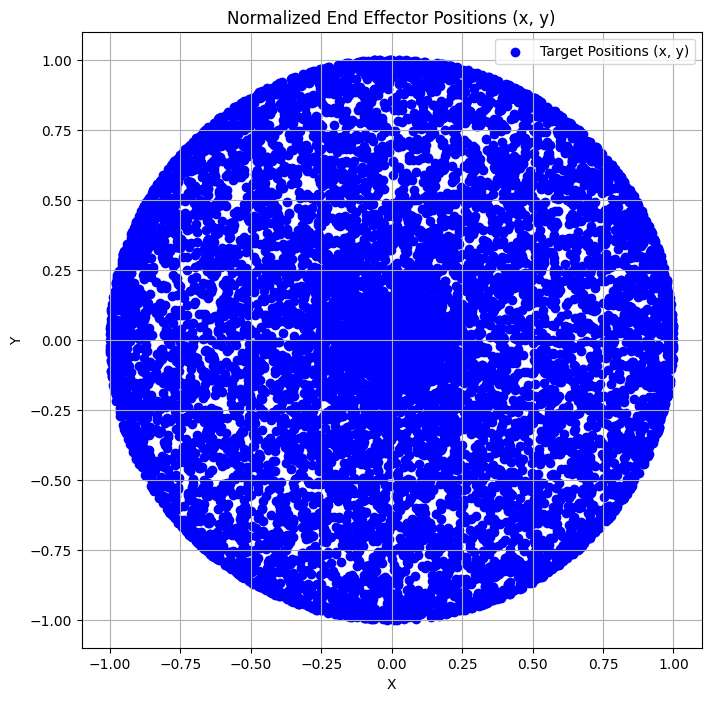

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the 2-joint robotic arm
L1 = 1.0  # Length of the first arm segment
L2 = 1.0  # Length of the second arm segment

# Generate random joint angles (theta1, theta2)
def generate_joint_angles(num_samples):
    # Generate random angles for theta1 and theta2 within the range [-pi, pi]
    theta1_vals = np.random.uniform(low=-np.pi, high=np.pi, size=num_samples)
    theta2_vals = np.random.uniform(low=-np.pi, high=np.pi, size=num_samples)
    return theta1_vals, theta2_vals

# Forward kinematics: Calculate end effector position (x, y) from joint angles
def forward_kinematics(theta1, theta2):
    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return x, y

# Generate dataset
def create_dataset(num_samples):
    X = []  # Target positions (x, y)
    Y = []  # Joint angles (theta1, theta2)

    # Generate random joint angles
    theta1_vals, theta2_vals = generate_joint_angles(num_samples)

    # Compute corresponding end effector positions
    for i in range(num_samples):
        x, y = forward_kinematics(theta1_vals[i], theta2_vals[i])
        X.append([x, y])  # Position (x, y)
        Y.append([theta1_vals[i], theta2_vals[i]])  # Joint angles (theta1, theta2)

    return np.array(X), np.array(Y)

# Create a dataset of 10,000 samples
num_samples = 10000
X, Y = create_dataset(num_samples)

# Normalize X (input positions) to be between -1 and 1
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_normalized = 2 * (X - X_min) / (X_max - X_min) - 1  # Min-Max Normalization

# Visualize the normalized dataset (optional)
plt.figure(figsize=(8, 8))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c='blue', label='Target Positions (x, y)')
plt.title('Normalized End Effector Positions (x, y)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


## Model Creation

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

# Define the neural network model with increased complexity
model = Sequential()

# First hidden layer with 256 neurons and ReLU activation
model.add(Dense(256, input_dim=2, activation='relu'))

# Second hidden layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))

# Third hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Fourth hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer: 2 neurons (theta1, theta2)
model.add(Dense(2))  # Output joint angles (theta1, theta2)

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss function

# Train the model for 200 epochs (increased number of epochs)
model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss}")

# Save the trained model for later use
model.save('ik_model_with_improvements.keras')


Epoch 1/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.8591 - val_loss: 2.7283
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6737 - val_loss: 2.7767
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6509 - val_loss: 2.6268
Epoch 4/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5751 - val_loss: 2.6383
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5911 - val_loss: 2.5974
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5584 - val_loss: 2.6463
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5725 - val_loss: 2.5704
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.5399 - val_loss: 2.6020
Epoch 9/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2.5442 - val_loss: 2.5659
Epoch 10/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.5752 - val_loss: 2.6138
Epoch 11/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5342 - val_loss: 2.5517
Epoch 12/200
250/250 ━━━━━━━━━━━━━━━━━━━

## Plot 2 Joints

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


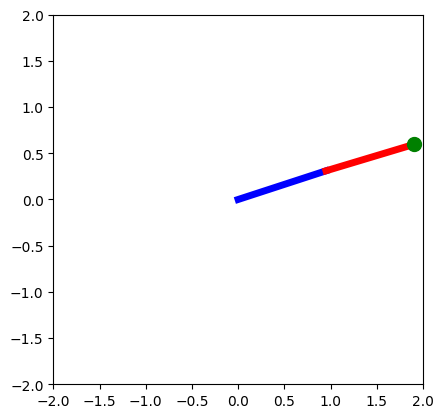

Predicted joint angles (theta1, theta2): [[    0.31537   -0.023638]]


In [22]:
# Function to plot the arm's configuration based on joint angles (theta1, theta2)
def plot_arm(theta1, theta2):
    x1 = L1 * np.cos(theta1)
    y1 = L1 * np.sin(theta1)
    x2 = x1 + L2 * np.cos(theta1 + theta2)
    y2 = y1 + L2 * np.sin(theta1 + theta2)

    plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # First segment
    plt.plot([x1, x2], [y1, y2], 'r-', linewidth=5)  # Second segment
    plt.plot(x2, y2, 'go', markersize=10)  # End effector
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Test the model on new data (target position)
new_target = np.array([[1.5, 0.5]])  # Example target position (x, y)

# Normalize the new target input using the same normalization as training data
new_target_normalized = 2 * (new_target - X_min) / (X_max - X_min) - 1

# Predict joint angles from the normalized target
predicted_angles = model.predict(new_target_normalized)  # Predicted joint angles (theta1, theta2)

# Extract predicted joint angles
theta1, theta2 = predicted_angles[0]

# Visualize the arm's configuration based on predicted joint angles
plot_arm(theta1, theta2)

# Output the predicted joint angles
print(f"Predicted joint angles (theta1, theta2): {predicted_angles}")


## Model Pridiction

In [23]:
# Evaluate the model's performance
predicted_angles = model.predict(X_test)

# Compare some of the predicted joint angles with the actual ones
print("Predicted joint angles (θ₁, θ₂):", predicted_angles[:5])
print("Actual joint angles (θ₁, θ₂):", Y_test[:5])


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted joint angles (θ₁, θ₂): [[     1.5956   -0.034143]
 [    0.64429    0.047461]
 [    0.38181   -0.049708]
 [    0.85877    -0.59516]
 [    0.60278   -0.021791]]
Actual joint angles (θ₁, θ₂): [[     1.5411     0.28308]
 [    0.20621      1.0561]
 [   -0.40755      1.5855]
 [   -0.47329      -2.826]
 [     0.6862   -0.059935]]
